# Pre-post performance models
In this file we are creating models that are based on the dataset that only contain
individual parameters and the preperformance and the postperformance.

In [3]:
import csv
from helpers import print_mean_squared_error, print_coefficient_of_determination, calculate_age
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [11]:
# Loads raw data and transforms.

individuals = pd.read_csv("./data/GeneratedIndividuals.csv", sep="|")
logs = pd.read_csv("./data/program_logs.csv", sep="|")

logs.head()
d = {}
for p_id, group in logs.groupby('ID'):
    d[str(p_id)] = group

set_count = len(d.get("0"))

# Generate headers
headers = []
for i in range (set_count):
    headers.append(f"rep{i}")
    headers.append(f"weight{i}")
headers.extend(["Age", "Gender", "Bodyweight", "Preperformance", "Performance"])

data = pd.DataFrame(columns=headers)
data.columns

# Transform data
for index, ind in individuals.iterrows():
    entry = []
    p_id = str(ind.get("ID"))
    
    for index, row in d.get(p_id).iterrows():
        entry.append(row["Reps"])
        entry.append(row["Weight"])
    
    entry.append(calculate_age(ind["Birth"]))
    entry.append(ind["Gender"])
    entry.append(ind["Weight"])
    
    preperformance = d.get(p_id)["Performance"].values[0]
    postperformance = d.get(p_id)["Performance"].values[-1]
    entry.append(preperformance)
    entry.append(postperformance)
    
    data = data.append(pd.Series(entry, index=data.columns), ignore_index=True)
    
data.head()


,rep0,weight0,rep1,weight1,rep2,weight2,rep3,weight3,rep4,weight4,...,weight62,rep63,weight63,rep64,weight64,Age,Gender,Bodyweight,Preperformance,Performance
0,10.0,50.0,10.0,60.0,8.0,70.0,6.0,65.00,6.0,75.00,...,85.00,2.0,90.0,2.0,90.0,30.0,0.0,51.954571,100.0,112.067484
1,10.0,53.5,10.0,64.2,8.0,74.9,6.0,69.55,6.0,80.25,...,90.95,2.0,96.3,2.0,96.3,31.0,0.0,48.560466,107.0,119.058888
2,10.0,51.5,10.0,61.8,8.0,72.1,6.0,66.95,6.0,77.25,...,87.55,2.0,92.7,2.0,92.7,37.0,0.0,49.705740,103.0,115.063668
3,10.0,50.5,10.0,60.6,8.0,70.7,6.0,65.65,6.0,75.75,...,85.85,2.0,90.9,2.0,90.9,26.0,1.0,51.601723,101.0,113.066189
4,10.0,51.0,10.0,61.2,8.0,71.4,6.0,66.30,6.0,76.50,...,86.70,2.0,91.8,2.0,91.8,27.0,1.0,53.723642,102.0,114.064917


In [12]:
data = data[["Age", "Gender", "Bodyweight", "Preperformance", "Performance"]]
data.head()


,Age,Gender,Bodyweight,Preperformance,Performance
0,30.0,0.0,51.954571,100.0,112.067484
1,31.0,0.0,48.560466,107.0,119.058888
2,37.0,0.0,49.705740,103.0,115.063668
3,26.0,1.0,51.601723,101.0,113.066189
4,27.0,1.0,53.723642,102.0,114.064917


In [20]:
# Split into training set and testing set.

# Read the CSV file.
data = pd.read_csv("./data/regression_dataframe_medium.csv")

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('Performance', axis=1)

Y = data_shuffled['Performance']
Y.head()

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)


In [21]:
data.head()


,rep0,weight0,rep1,weight1,rep2,weight2,rep3,weight3,rep4,weight4,...,weight62,rep63,weight63,rep64,weight64,Age,Gender,Bodyweight,Preperformance,Performance
0,10.0,50.0,10.0,60.0,8.0,70.0,6.0,65.00,6.0,75.00,...,85.00,2.0,90.0,2.0,90.0,30.0,0.0,51.954571,100.0,112.067484
1,10.0,53.5,10.0,64.2,8.0,74.9,6.0,69.55,6.0,80.25,...,90.95,2.0,96.3,2.0,96.3,31.0,0.0,48.560466,107.0,119.058888
2,10.0,51.5,10.0,61.8,8.0,72.1,6.0,66.95,6.0,77.25,...,87.55,2.0,92.7,2.0,92.7,37.0,0.0,49.705740,103.0,115.063668
3,10.0,50.5,10.0,60.6,8.0,70.7,6.0,65.65,6.0,75.75,...,85.85,2.0,90.9,2.0,90.9,26.0,1.0,51.601723,101.0,113.066189
4,10.0,51.0,10.0,61.2,8.0,71.4,6.0,66.30,6.0,76.50,...,86.70,2.0,91.8,2.0,91.8,27.0,1.0,53.723642,102.0,114.064917


## Regular linear regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


#Träna modellen
lr = LinearRegression()
lr.fit(Xtrain,Ytrain)

#Använd på testsettet
Ypred = lr.predict(Xtest)

lr_mean_squared_error = mean_squared_error(Ytest, Ypred)
lr_r2_score = r2_score(Ytest, Ypred)

print_mean_squared_error(lr_mean_squared_error)
print_coefficient_of_determination(lr_r2_score)

Mean squared error: 0.00
Coefficient of determination: 1.00


## Ridge regression

In [25]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(Xtrain, Ytrain)
# Ridge()
ridge_Ypred = ridge.predict(Xtest)


ridge_mean_squared_error = mean_squared_error(Ytest, ridge_Ypred)
ridge_r2_score = r2_score(Ytest, ridge_Ypred)

print_mean_squared_error(ridge_mean_squared_error)
print_coefficient_of_determination(ridge_r2_score)

Mean squared error: 0.00
Coefficient of determination: 1.00


## Lasso regression

In [26]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(Xtrain,Ytrain)
lasso_Ypred = lasso.predict(Xtest)

lasso_mean_squared_error = mean_squared_error(Ytest, lasso_Ypred)
lasso_r2_score = r2_score(Ytest, lasso_Ypred)

print_mean_squared_error(lasso_mean_squared_error)
print_coefficient_of_determination(lasso_r2_score)

Mean squared error: 0.00
Coefficient of determination: 1.00


c:\users\razan\modell\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.92447103732094, tolerance: 10.13388673358608
  positive)


## Summaries of the results

In [ ]:
print("Normal linear regression:")
print_mean_squared_error(lr_mean_squared_error)
print_coefficient_of_determination(lr_r2_score)
print("\n")

print("Ridge regression:")
print_mean_squared_error(ridge_mean_squared_error)
print_coefficient_of_determination(ridge_r2_score)
print("\n")

print("Lasso regression:")
print_mean_squared_error(lasso_mean_squared_error)
print_coefficient_of_determination(lasso_r2_score)
print("\n")

plt.scatter(Xtest["Preperformance"], Ytest, color='black')
plt.plot(Xtest["Preperformance"], Ypred, color='blue', linewidth=1)
plt.plot(Xtest["Preperformance"], ridge_Ypred, color='green', linewidth=1)
plt.plot(Xtest["Preperformance"], lasso_Ypred, color='red', linewidth=1)
plt.xticks(())
plt.yticks(())
plt.show()

# Save model
Saves the choosen model(s) to a file to be used in the recommendation engine.

In [ ]:
import pickle

# In the current state of recommendation engine, it is important to name the model after
# the program the data comes from. (i.e the name of the csv file in simulator/training_programs)
# Should probably make this automatic in some way.

filename = 'ogasawara_LL.sav'
pickle.dump(ridge, open(filename, 'wb'))

Normal linear regression:
Mean squared error: 0.00
Coefficient of determination: 1.00


Ridge regression:
Mean squared error: 0.00
Coefficient of determination: 1.00


Lasso regression:
Mean squared error: 0.00
Coefficient of determination: 1.00




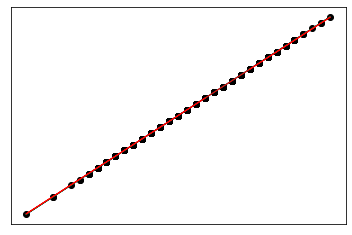

In [27]:
import pickle

# In the current state of recommendation engine, it is important to name the model after
# the program the data comes from. (i.e the name of the csv file in simulator/training_programs)
# Should probably make this automatic in some way.

filename = 'ogasawara_LL.sav'
pickle.dump(ridge, open(filename, 'wb'))

# Save model
Saves the choosen model(s) to a file to be used in the recommendation engine.

In [9]:
import pickle

# In the current state of recommendation engine, it is important to name the model after
# the program the data comes from. (i.e the name of the csv file in simulator/training_programs)
# Should probably make this automatic in some way.

filename = 'ogasawara_LL.sav'
pickle.dump(ridge, open(filename, 'wb'))